# Assignment 2 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Logistic Regression`.


## Instructions
- Do not Use Direct Inbuilt functions for the Task.
- Numpy or other math libraries are allowed.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not change the contents of the Given cells. Use new cells to Write your code.


## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q3.ipynb`
- Fill the Name and Roll number in the below markdown

Name: <br>
Roll Number:

### Dataset

Use the code below to load the Dataset


In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
from sklearn.datasets import make_blobs
X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

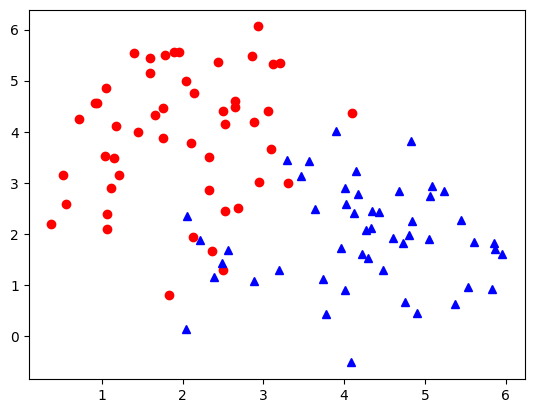

In [94]:
#Visualize dataset 
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')


Write your code below for logistic regression with Gradient Descent and plot the decision boundary.<br>
Sample output is given in the file `LogisticRegression_sample_result.png`

In [95]:
import pandas as pd
pd.DataFrame(X)

,0,1
0,1.890983,5.556186
1,4.348489,2.449118
2,5.850044,1.824194
3,4.120722,2.414025
4,4.676640,2.831106
...,...,...
95,5.605993,1.846338
96,1.955805,5.567633
97,1.590429,5.447407
98,4.752313,0.665079


In [96]:
pd.DataFrame(y)

,0
0,0
1,1
2,1
3,1
4,1
...,...
95,1
96,0
97,0
98,1


In [102]:



class logistic_regression():
    def __init__(self, learning_rate, threshold=0.5):
        self.learning_rate = learning_rate
        self.threshold = threshold
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    def fit(self, x, y, epochs):
        self.parameters, gradient = np.zeros(x[0].shape), np.zeros(x[0].shape)
        self.bias = 0
        bias_gradient = 0
        for _ in range(epochs):
            loss = 0
            diff = 0
            for i in range(len(x)):
                y_hat = self.sigmoid(np.dot(self.parameters, x[i]) + self.bias)
                diff = y_hat - y[i]
                gradient += self.learning_rate*(diff)*x[i]
                bias_gradient += self.learning_rate*(diff)
            gradient /= len(y)
            bias_gradient /= len(y)
            self.parameters -= self.learning_rate*(gradient)
            self.bias -= self.learning_rate*(bias_gradient)
            pass
    def process(self, z):
        if(z > self.threshold):
            return 1
        else:
            return 0
    def predict(self, x_test):
        y_pred = []
        for i in range(len(x_test)):
            y_pred += [self.process(self.sigmoid(np.dot(self.parameters, x_test[i]) + self.bias))]
        y_pred = np.array(y_pred)
        return y_pred
    def eval(self, y, y_hat):
        score = 0
        for i in range(len(y)):
            if(y[i] == y_hat[i]):
                score += 1
        return score/len(y)*100



x = logistic_regression(learning_rate=0.9)
x.fit(x_train, y_train, 1000)
y_pred = x.predict(x_test)
# y - y_pred
print(x.parameters, x.bias)

[ 3.82103802 -2.02819776] -5.755212221260065


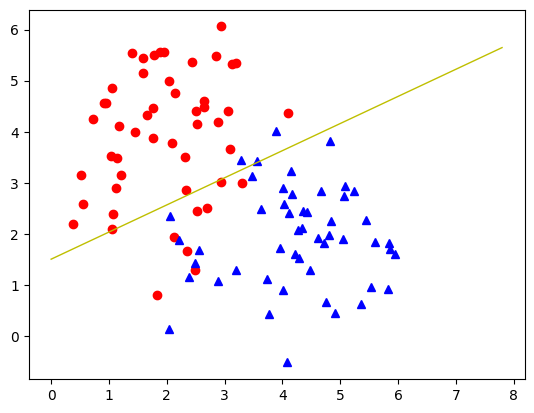

In [117]:
fig, ax = plt.subplots()
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')
theta_1 = x.parameters[0]
theta_2 = x.parameters[1]
theta_3 = x.bias
x_values = [0, -theta_3/theta_2]
y_values = [-theta_3/theta_1, 0]
line_eqn = lambda x : ((y_values[1]-y_values[0])/(x_values[1]-x_values[0])) * (x - x_values[0]) + y_values[0] 
slope = (y_values[1]-y_values[0])/(x_values[1] - x_values[0])
xrange = np.arange(0, 8, 0.2)
plt.plot(xrange, [ line_eqn(x) for x in xrange], color='y', linestyle='-', linewidth=1)
plt.show()

In [114]:
np.arange(0, 7, 0.2)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ,
       5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8])

### Questions

1) Explain the approach of Logistic Regression.<br>
2) What is the loss function used?<br>
3) Explain if we can use Mean Square Error(MSE) as Loss function.